In [70]:
import numpy as np 
import emcee
import corner
import h5py
from sunpy.coordinates.sun import carrington_rotation_time
import astropy.units as u
import os
from mycolorpy import colorlist as mcp
import scipy

In [71]:
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'serif',
        'size'   : 15}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

In [72]:
CR_list = [2052, 2053, 2054, 2055, 2056, 2057, 2058]
CR_color_list = np.array(mcp.gen_color(cmap="plasma", n=len(CR_list)))

In [73]:
samples_hist = []

In [74]:
for cr in CR_list:
    reader = emcee.backends.HDFBackend("MCMC_results/MCMC_CR" + str(cr) + ".h5")
    
    # burn-in disgregard 
    nburnin = 0
    # read in samples
    samples_flatten = reader.get_chain(flat=True, discard=nburnin)
    samples_hist.append(samples_flatten)

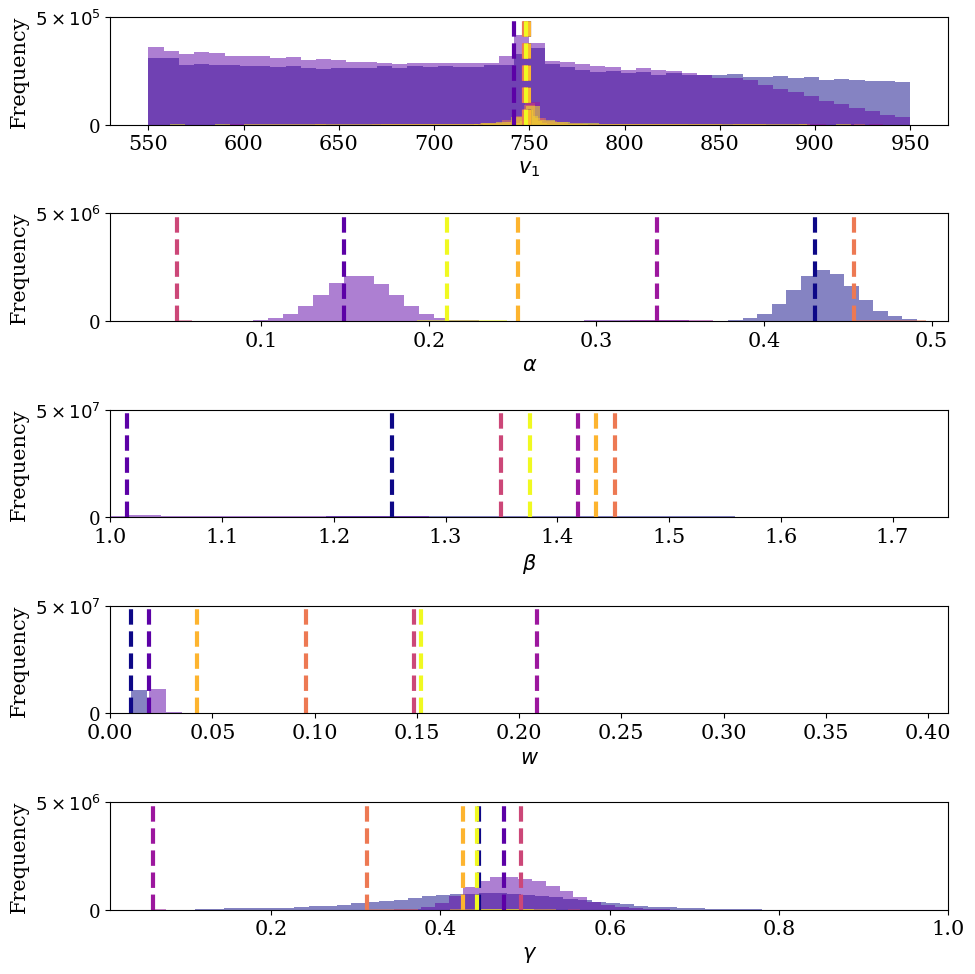

In [80]:
fig, ax = plt.subplots(nrows=5, figsize=(10,10))
for ii in range(5):
    for jj in range(len(CR_list)):
        n, bins, _ = ax[ii].hist(samples_hist[jj][:, ii], 50, color=CR_color_list[jj], linewidth=3, alpha=0.5)
        ax[ii].axvline(bins[np.where(n == n.max())], label="$MAP$", color=CR_color_list[jj], ls="--", linewidth=3)
    if ii==0:
        ax[ii].set_xlim(530, 970)
        ax[ii].set_xlabel(r"$v_{1}$")
        ax[ii].set_ylabel("Frequency")
        ax[ii].set_yticks([0, 50000])
        ax[ii].set_yticklabels(["0", r"$5 \times 10^{5}$"], fontsize=13)
    elif ii==1:
        ax[ii].set_xlim(0.01, 0.51)
        ax[ii].set_xlabel(r"$\alpha$")
        ax[ii].set_ylabel("Frequency")
        ax[ii].set_yticks([0, 500000])
        ax[ii].set_yticklabels(["0", r"$5 \times 10^{6}$"], fontsize=13)
    elif ii==2:
        ax[ii].set_xlim(1, 1.75)
        ax[ii].set_xlabel(r"$\beta$")
        ax[ii].set_ylabel("Frequency")
        ax[ii].set_yticks([0, 5000000])
        ax[ii].set_yticklabels(["0", r"$5 \times 10^{7}$"], fontsize=13)
    elif ii==3:
        ax[ii].set_xlim(0, 0.41)
        ax[ii].set_xlabel(r"$w$")
        ax[ii].set_ylabel("Frequency")
        ax[ii].set_yticks([0, 5000000])
        ax[ii].set_yticklabels(["0", r"$5 \times 10^{7}$"], fontsize=13)
    elif ii==4:
        ax[ii].set_xlim(0.01, 1)
        ax[ii].set_xlabel(r"$\gamma$")
        ax[ii].set_ylabel("Frequency")
        ax[ii].set_yticks([0, 500000])
        ax[ii].set_yticklabels(["0", r"$5 \times 10^{6}$"], fontsize=13)
plt.tight_layout()